## Linear Regression and RANSAC

In [1]:
# Load the modules we need
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [2]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [3]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [4]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [5]:
# TASK 2 ANSWER
def linear_regression(X, y):
    N = np.size(X)
    
    m_x = np.mean(X)
    m_y = np.mean(y)
    
    num = 0
    den = 0
    
    for i in range(N):
        num += (X[i] - m_x) * (y[i] - m_y)
        den += (X[i] - m_x) ** 2
    m = num / den
    c = m_y - m*m_x
    
    return (c, m)

def prediction(line_X, coef):
    line_y = []
    for x in line_X:
        y = x * coef[1] + coef[0]
        line_y.append(y)
    return line_y

coef = linear_regression(X, y)
print(coef)
line_y1 = prediction(line_X, coef)
print(line_y1)

(array([-9.36646643]), array([54.17236387]))
[array([-174.38323639]), array([-120.21087252]), array([-66.03850865]), array([-11.86614478]), array([42.30621909]), array([96.47858295]), array([150.65094682]), array([204.82331069])]


In [6]:
# This is the cell you need to replace to complete Task 2.
# Fit line using all data.
lr = linear_model.LinearRegression()
lr.fit(X, y)
line_y = lr.predict(line_X)
print(line_y)

[-174.38323639 -120.21087252  -66.03850865  -11.86614478   42.30621909
   96.47858295  150.65094682  204.82331069]


In [7]:
# TASK 3 ANSWER
import random
import math

def calc_iterations(probability, sample_size, outlier_ratio):
    numerator = math.log(1 - probability, 10)
    denominator = math.log(1 - (1 - outlier_ratio) ** sample_size , 10)
    return round(numerator / denominator) if denominator != 0 else 1177

def random_sample(sample_size, dataset_size):
    indexes = []
    for i in range(sample_size):
        index = random.randint(0, dataset_size - 1)
        while index in indexes:
            index = random.randint(0, dataset_size - 1)
        indexes.append(index)
    return indexes

def square_distance(x_val, y_val, m, c):
    return (m * x_val + c - y_val) ** 2

def calc_ratio(X, y, m, c, t):
    count = 0
    for i in range(len(X)):
        if square_distance(X[i], y[i], m, c) < t:
            count += 1
    return count / len(X)

def RANSAC(X, y, ss):
    threshold = 50
    ratio = 0
    sample_size = ss
    p = 0.99
    N = calc_iterations(p, sample_size, 1 - ratio)
    i = 0
    
    cm_pair = [0, 0]
    
    while i < N:
        sample_indexes = random_sample(sample_size, len(X))
        x_sample = []
        y_sample = []
        
        for j in sample_indexes:
            x_sample.append(X[j])
            y_sample.append(y[j])
        
        c, m = linear_regression(x_sample, y_sample)
        s_ratio = calc_ratio(X, y, m, c, threshold)
        
        
        if s_ratio > ratio:
            ratio = s_ratio
            cm_pair = [c, m]
            N = calc_iterations(p, sample_size, 1 - ratio)
        
        i += 1
        
    return cm_pair
        
coef = RANSAC(X, y, 10)
line_Y_ran = prediction(line_X, coef)

In [8]:
# This is the cell you need to replace to complete Task 3.
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

# Predict data of estimated models
line_y_ransac = ransac.predict(line_X)
print(line_y_ransac)

# Label the if source data is inlier or outlier
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

[-249.81104528 -167.72571369  -85.64038211   -3.55505052   78.53028107
  160.61561265  242.70094424  324.78627583]


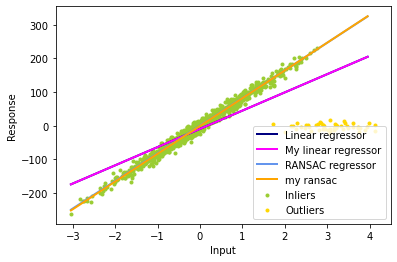

In [9]:
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
    plt.plot(line_X, line_y1, color='magenta', linewidth=lw, label='My linear regressor')

if (doing_ransac):
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
    plt.plot(line_X, line_Y_ran, color='orange', linewidth=lw, label='my ransac')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()